In [1]:
#load dataset
#Clean dataset, negatives and nulls and 0 distances and 0 passengers
#Calculate distance between pickup and drop off
#encoded year column
#encoded day column
#encoded hour column
#Fare vs distance
#ToD vs fare
#tod vs fare/distance
#heatmap of fare/distance ratio for pickups on city.
#map plot of pickup/dropoff with alpha, pickup/dropoff diff colors


In [2]:
#import libraries and training dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_df =  pd.read_csv('train.csv', nrows = 1000000, parse_dates=["pickup_datetime"])

In [3]:
train_df.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3                1  
4                1

In [4]:
train_df.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [5]:
train_df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  1000000.000000    1000000.000000   1000000.000000      999990.000000   
mean        11.348079        -72.526640        39.929008         -72.527860   
std          9.822090         12.057937         7.626154          11.324494   
min        -44.900000      -3377.680935     -3116.285383       -3383.296608   
25%          6.000000        -73.992060        40.734965         -73.991385   
50%          8.500000        -73.981792        40.752695         -73.980135   
75%         12.500000        -73.967094        40.767154         -73.963654   
max        500.000000       2522.271325      2621.628430          45.581619   

       dropoff_latitude  passenger_count  
count     999990.000000   1000000.000000  
mean          39.919954         1.684924  
std            8.201418         1.323911  
min        -3114.338567         0.000000  
25%           40.734046         1.000000  
50%           40.753166         1.000000  
75%           40.768129         2.000000  
max         1651.553433       208.000000

In [6]:
#delete negative fares 
print('Old size: %d' % len(train_df))
train_df = train_df[train_df.fare_amount>=0]
print('New size: %d' % len(train_df))

Old size: 1000000
New size: 999962


In [7]:
#drop nulls
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))

Old size: 999962
New size: 999952


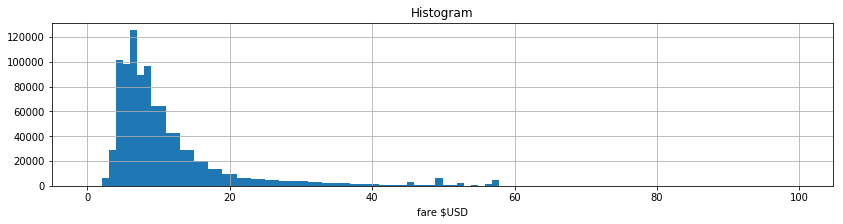

In [8]:
#look at fare distribution
train_df[train_df.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');
#most fares are under 20 usd, some outliers

In [9]:
#remove trips with anomalous passenger counts 
print('Old size: %d' % len(train_df))
train_df = train_df[train_df.passenger_count<10]
print('New size: %d' % len(train_df))

Old size: 999952
New size: 999951


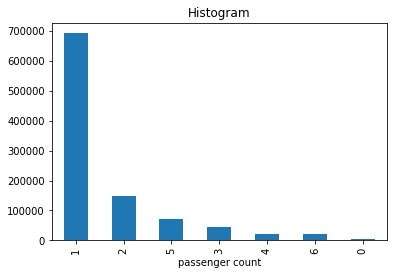

In [10]:
#look at passenger count distribution
train_df["passenger_count"].value_counts().plot(kind='bar')
plt.xlabel('passenger count')
plt.title('Histogram');
#majority of trips are with 1 passenger

In [11]:
#get corresponding year, weekday and hour from datetime
train_df['year'] = train_df.pickup_datetime.apply(lambda t: t.year)
train_df['weekday'] = train_df.pickup_datetime.apply(lambda t: t.weekday())
train_df['hour'] = train_df.pickup_datetime.apply(lambda t: t.hour)
train_df.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  year  weekday  hour  
0                1  2009        0    17  
1                1  2010        1    16  
2                2  2011        3     0  
3                1  2012        5     4  
4                1  2010        1     7

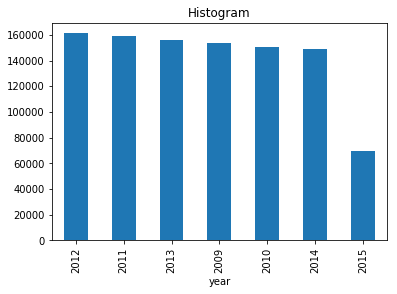

In [12]:
#how many samples from each year
train_df["year"].value_counts().plot(kind='bar')
plt.xlabel('year')
plt.title('Histogram');
#max year 2015? less samples in 2015?

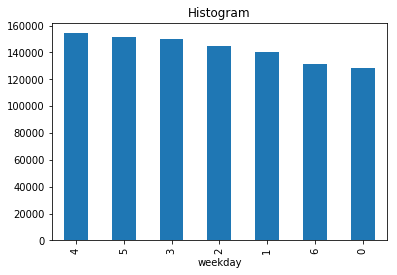

In [13]:
#how many rides per weekday in total
train_df["weekday"].value_counts().plot(kind='bar')
plt.xlabel('weekday')
plt.title('Histogram');
#less rides on sundays and saturdays? most on thursdays

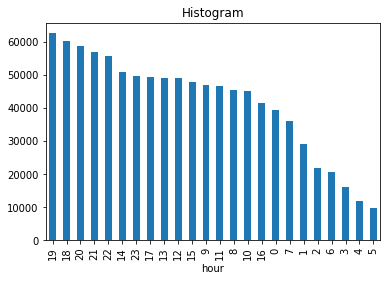

In [14]:
#how many rides per hour in total?
train_df["hour"].value_counts().plot(kind='bar')
plt.xlabel('hour')
plt.title('Histogram');
#5am is lowest and 1900 is peak 

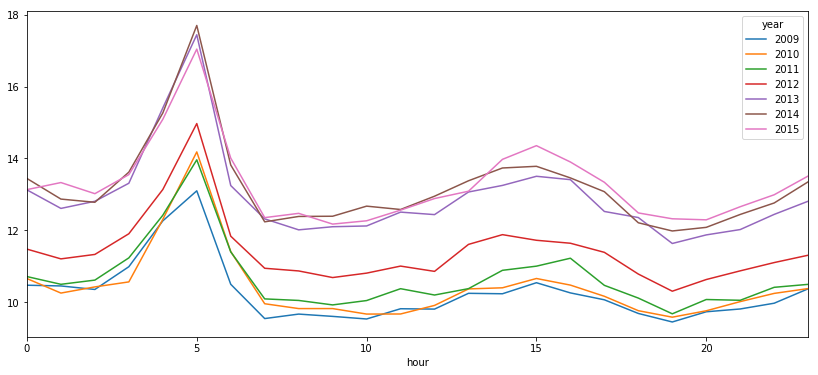

In [15]:
#what are the mean fares across a 24h totalled period for each year
train_df.pivot_table('fare_amount', index='hour', columns='year').plot(figsize=(14,6))
#fares rise each year, fares rise at 5am and 1500

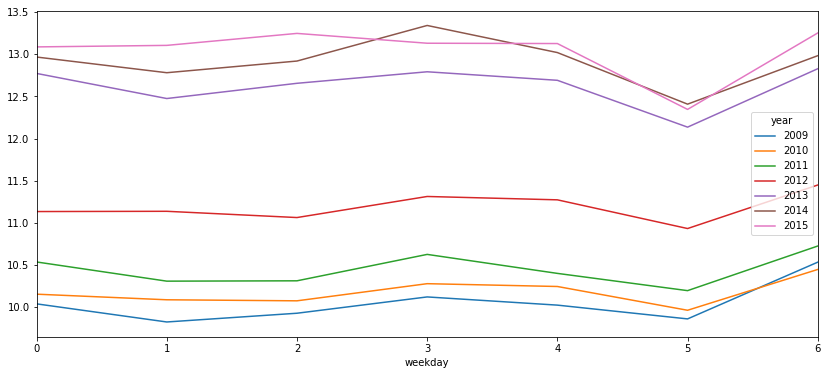

In [16]:
#what are the mean fares totalled across each weekday?
train_df.pivot_table('fare_amount', index='weekday', columns='year').plot(figsize=(14,6))
#fares go down on fridays?

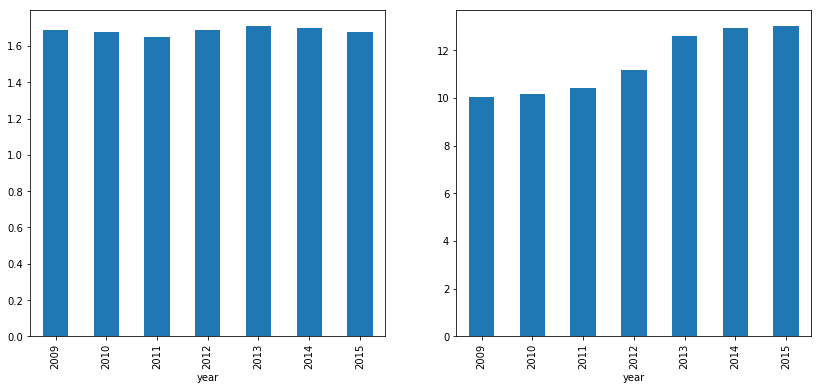

In [17]:
#how many people on average each year in each car and what the average fare?
groupedMean = train_df.groupby('year')['passenger_count', 'fare_amount'].mean()
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,6))
groupedMean["passenger_count"].plot(kind='bar', ax=ax1)
groupedMean["fare_amount"].plot(kind='bar', ax=ax2)
plt.show()
#average people per car stayed around the same, whilst average fare went up.

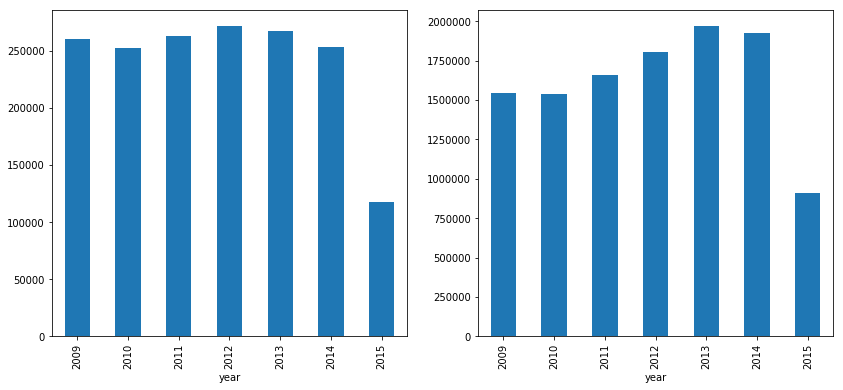

In [18]:
#same as above but sums
grouped = train_df.groupby('year')['passenger_count', 'fare_amount'].sum()
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,6))
grouped["passenger_count"].plot(kind='bar', ax=ax1)
grouped["fare_amount"].plot(kind='bar', ax=ax2)
plt.show()

In [19]:
#use geod to calculate distance between 2 lat/long points
from pyproj import Geod
wgs84_geod = Geod(ellps='WGS84') #Distance will be measured on this ellipsoid - more accurate than a spherical method
#Get distance between pairs of lat-lon points
def Distance(lat1,lon1,lat2,lon2):
  az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2) #Yes, this order is correct
  return dist

In [20]:
train_df["distance_meters"] = Distance(train_df['pickup_longitude'].tolist(),train_df['pickup_latitude'].tolist(),train_df['dropoff_longitude'].tolist(),train_df['dropoff_latitude'].tolist()) 
train_df["distance_meters"] = train_df["distance_meters"].round(2)
train_df.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  year  weekday  hour  distance_meters  
0                1  2009        0    17           412.06  
1                1  2010        1    16          4646.23  
2                2  2011        3     0          1004.80  
3                1  2012        5     4           914.15  
4                1  2010        1     7          1366.16

In [21]:
#remove really long trips and remove 0 distance trips
print('Old size: %d' % len(train_df))

train_df["distance_km"] = train_df["distance_meters"]/1000
train_df["distance_km"] = train_df["distance_km"].round(2)
train_df = train_df[train_df.distance_km>=0.01]
train_df = train_df[train_df.distance_km<=500]
print('New size: %d' % len(train_df))

train_df["distance_km"].describe()

Old size: 999951
New size: 967522


count    967522.000000
mean          2.770124
std           4.370605
min           0.010000
25%           0.880000
50%           1.580000
75%           2.870000
max         464.480000
Name: distance_km, dtype: float64

Text(0.5, 1.0, 'Histogram ride distances in km')

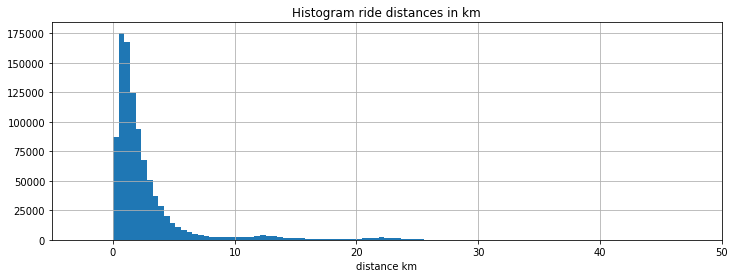

In [22]:
#look at distribution of trip distances
train_df.distance_km.hist(bins=1000, figsize=(12,4))
plt.xlim(-5, 50)
plt.xlabel('distance km')
plt.title('Histogram ride distances in km')
#most are under 5-3 KM

In [23]:
#does the distance correlate with anything?
corr = train_df[["passenger_count", "distance_km", "fare_amount"]].corr()
corr.style.background_gradient(cmap='coolwarm')
#correlates slightly with fare..

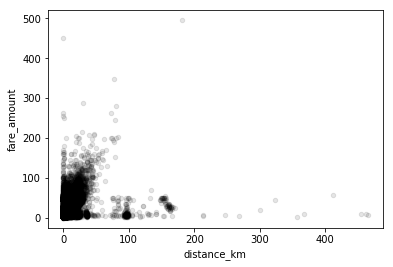

In [24]:
#lots of expensive short trips?
train_df.plot(kind="scatter", x='distance_km', y='fare_amount', color='black', alpha=0.1)
plt.show()

In [25]:
#create bounding box for map based on test dataset
df_test =  pd.read_csv('test.csv')
df_test.head(5)

key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC        -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC        -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC        -73.966046   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.763805         -73.981430         40.743835                1  
1        40.719383         -73.998886         40.739201                1  
2        40.751260         -73.979654         40.746139                1  
3        40.767807         -73.990448         40.751635                1  
4        40.789775         -73.988565         40.744427                1

In [26]:
min(df_test.pickup_longitude.min(), df_test.dropoff_longitude.min()), \
max(df_test.pickup_longitude.max(), df_test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [27]:
min(df_test.pickup_latitude.min(), df_test.dropoff_latitude.min()), \
max(df_test.pickup_latitude.max(), df_test.dropoff_latitude.max())

(40.568973, 41.709555)

In [28]:
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [29]:
print('Old size: %d' % len(train_df))
train_df = train_df[select_within_boundingbox(train_df, BB)]
print('New size: %d' % len(train_df))

Old size: 967522
New size: 966547


In [30]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, ax = plt.subplots(1, 1, figsize=(20,20))
    ax.scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='black', s=s)
    ax.set_xlim((BB[0], BB[1]))
    ax.set_ylim((BB[2], BB[3]))
    ax.set_title('Pickup locations')
    ax.imshow(nyc_map, zorder=0, extent=BB)

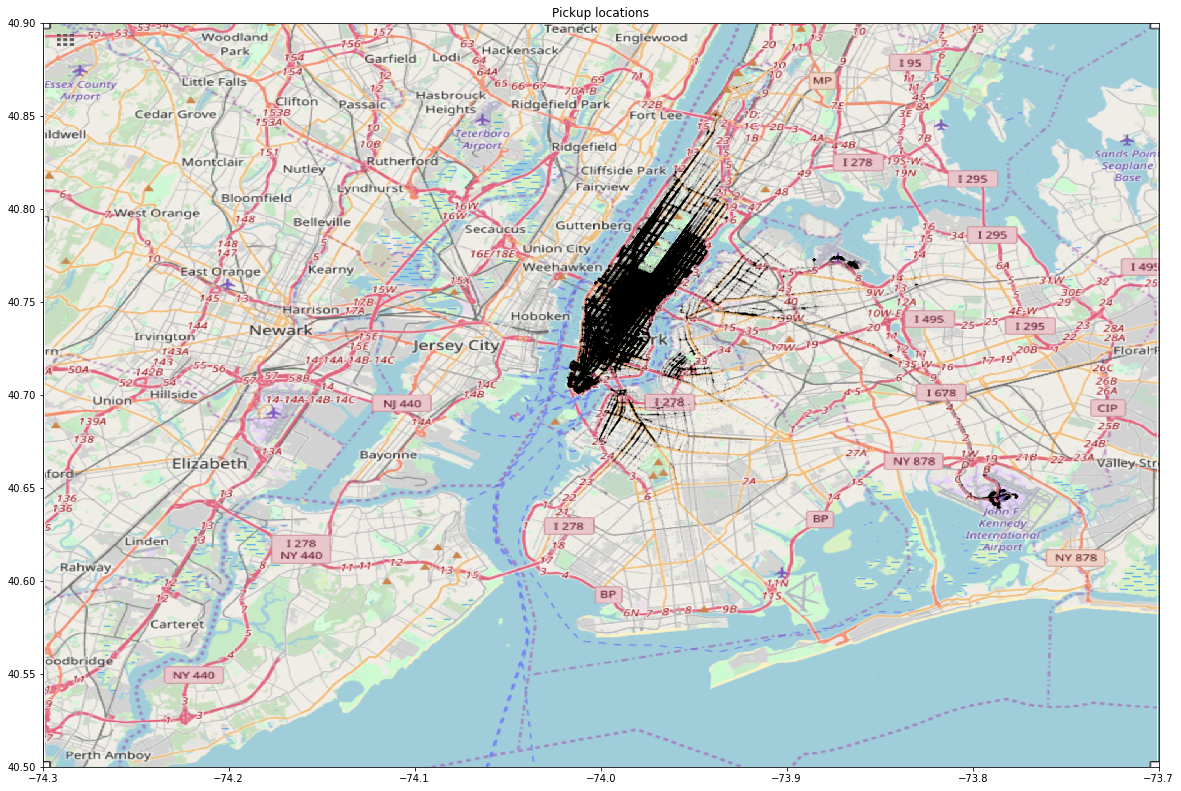

In [31]:
plot_on_map(train_df, BB_zoom, nyc_map_zoom, s=0.1, alpha=0.1)

In [32]:
#zoom into dataset with no map
xlim = [-74.03, -73.77]
ylim = [40.63, 40.85]
print('Old size: %d' % len(train_df))
df = train_df[(train_df.pickup_longitude> xlim[0]) & (train_df.pickup_longitude < xlim[1])]
df = df[(df.dropoff_longitude> xlim[0]) & (df.dropoff_longitude < xlim[1])]
df = df[(df.pickup_latitude> ylim[0]) & (df.pickup_latitude < ylim[1])]
df = df[(df.dropoff_latitude> ylim[0]) & (df.dropoff_latitude < ylim[1])]
print('New size: %d' % len(df))

Old size: 966547
New size: 954585


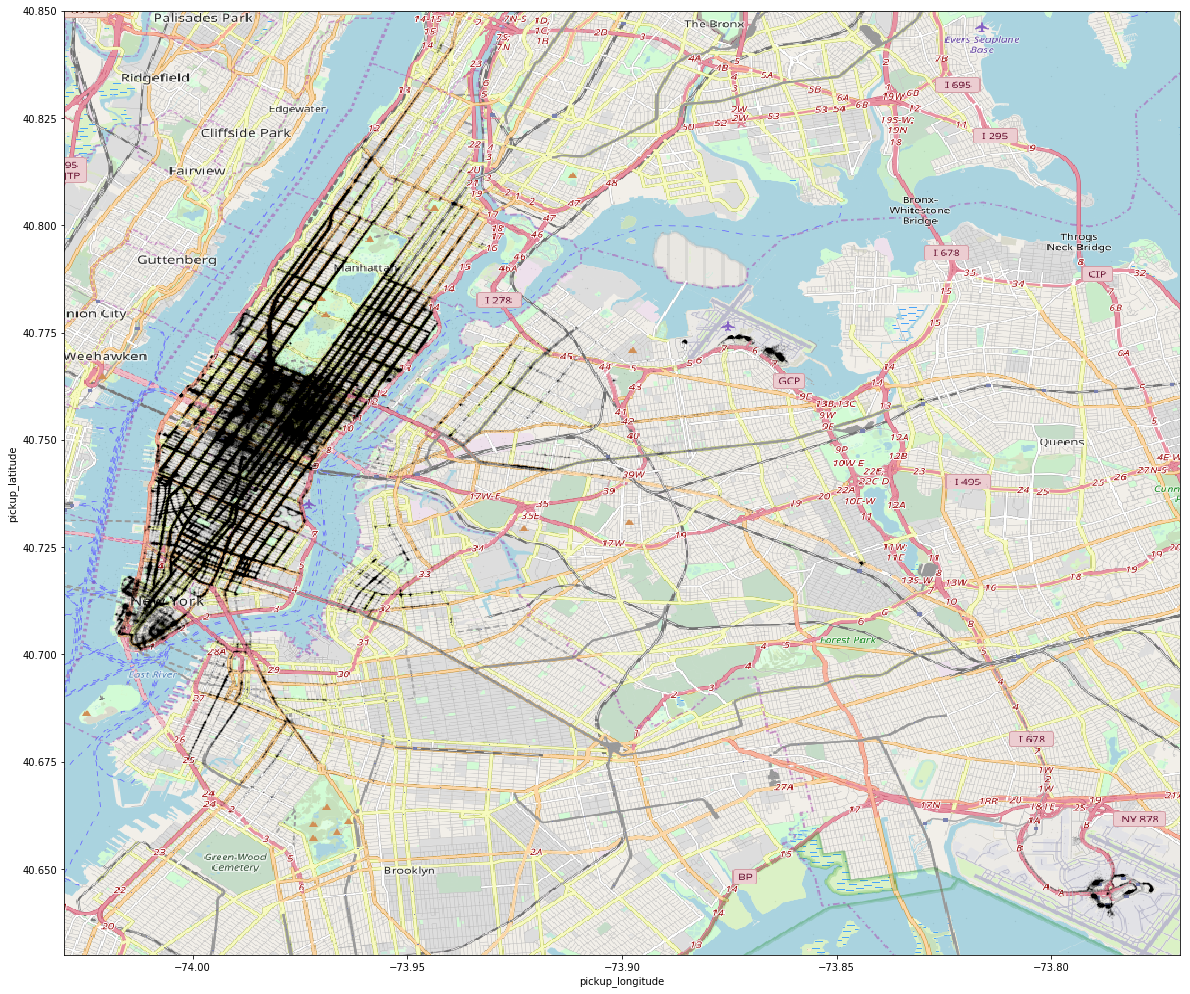

In [33]:
nyc_map_zoom1 = plt.imread('new_york_map2.png')
fig, (ax1) = plt.subplots(1,1, figsize=(20,20))
df.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", color='black', alpha=0.1, s=0.1, ax=ax1)
ax1.imshow(nyc_map_zoom1, zorder=0, extent=(-74.03, -73.77, 40.63, 40.85))
plt.show()

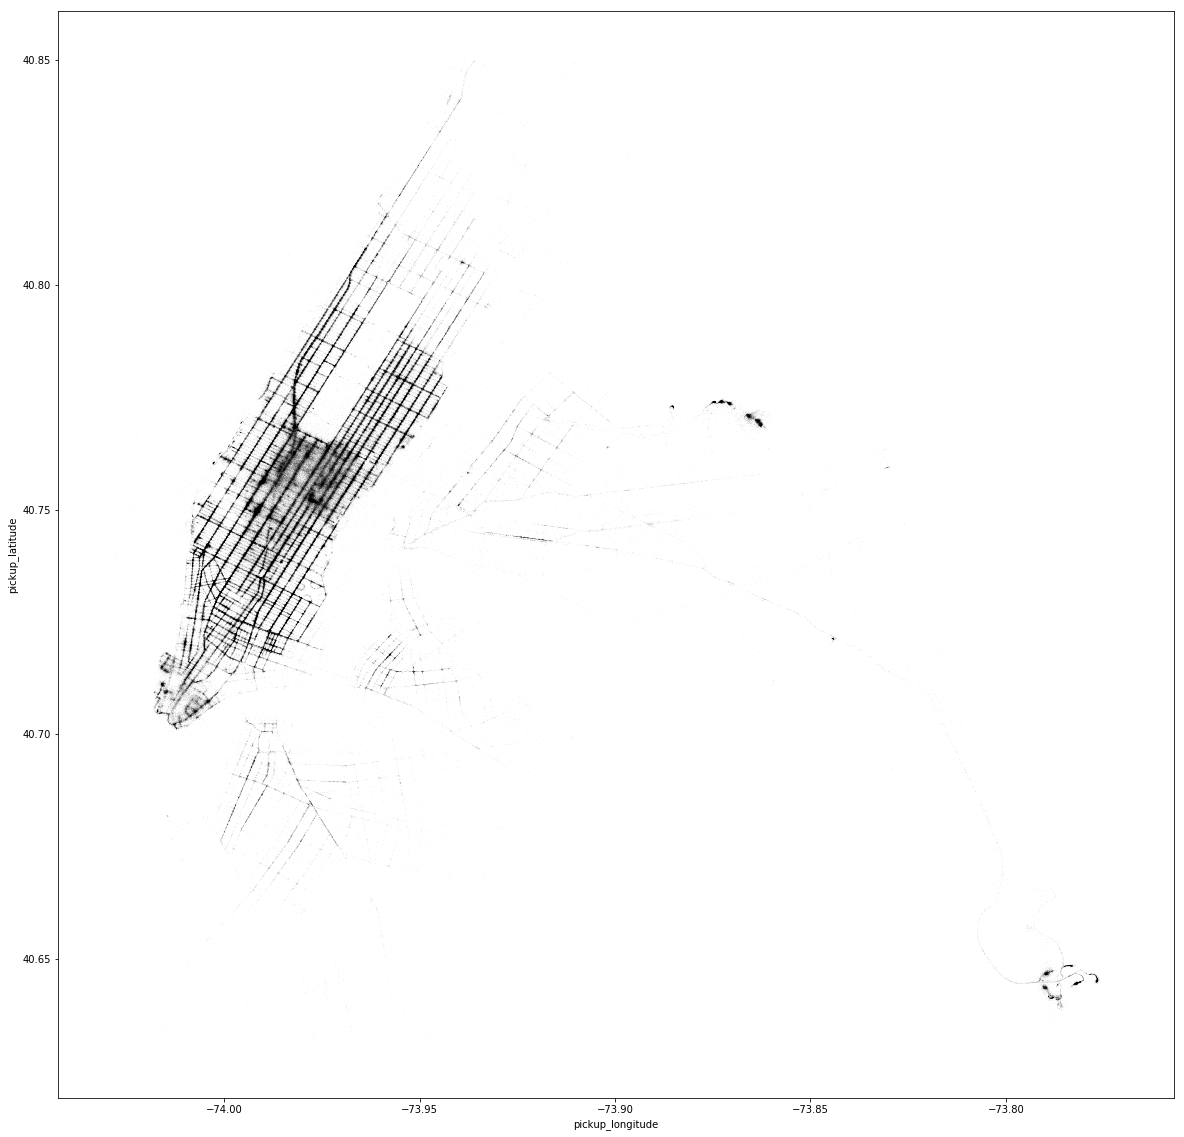

In [34]:
fig, (ax1) = plt.subplots(1,1, figsize=(20,20))
df.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", color='black', alpha=0.1, s=0.01, ax=ax1)

plt.show()

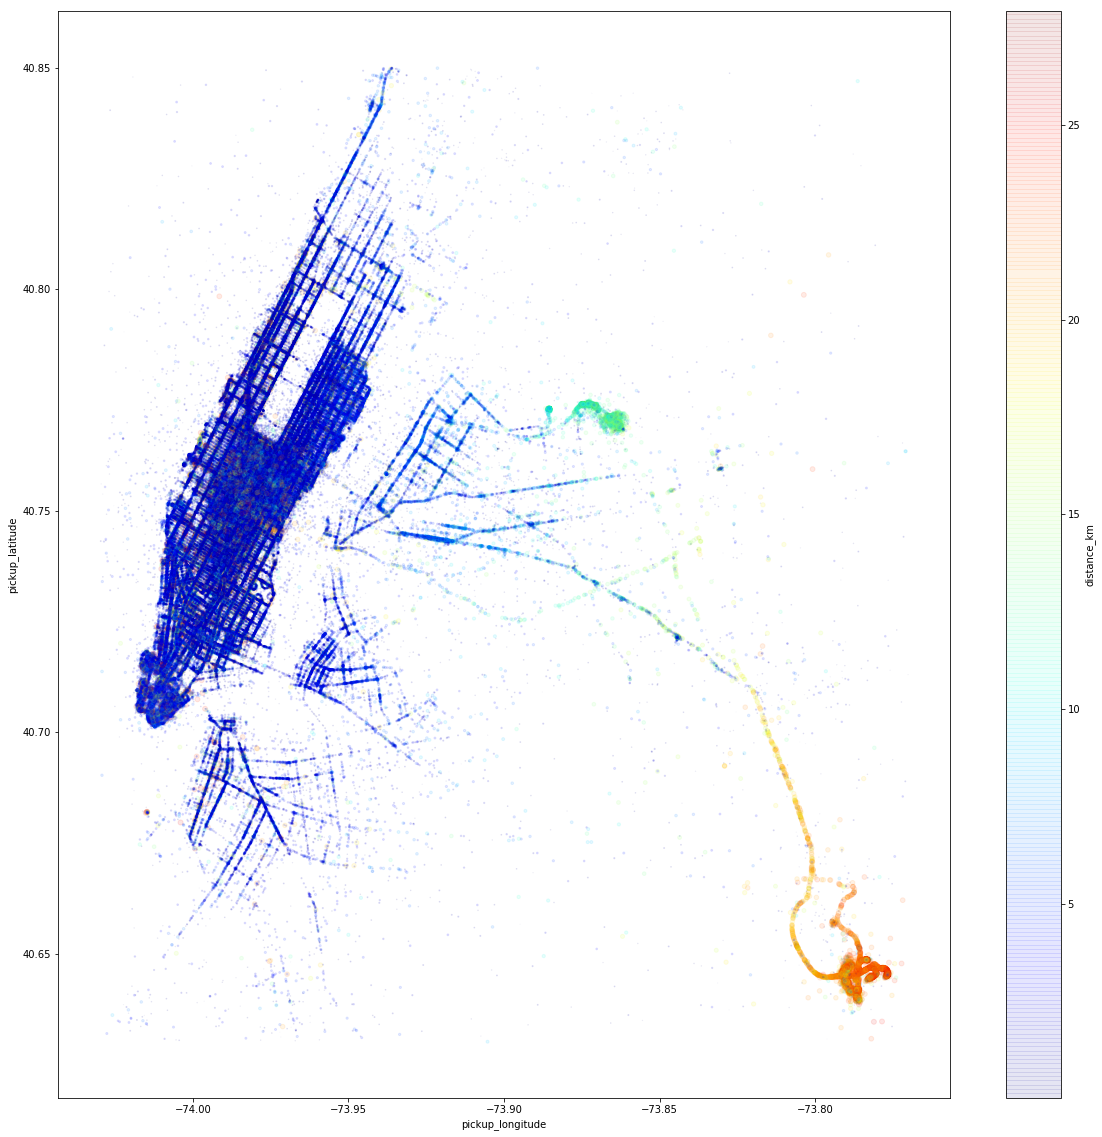

In [35]:
#look at distance travelled from pickup point 
fig, (ax1) = plt.subplots(1,1, figsize=(20,20))
df.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", c="distance_km", cmap=plt.get_cmap("jet"), alpha=0.1, s=df['distance_km'], ax=ax1)
plt.show()
#more in the airports? some long trips in the city? especially that orange dot!

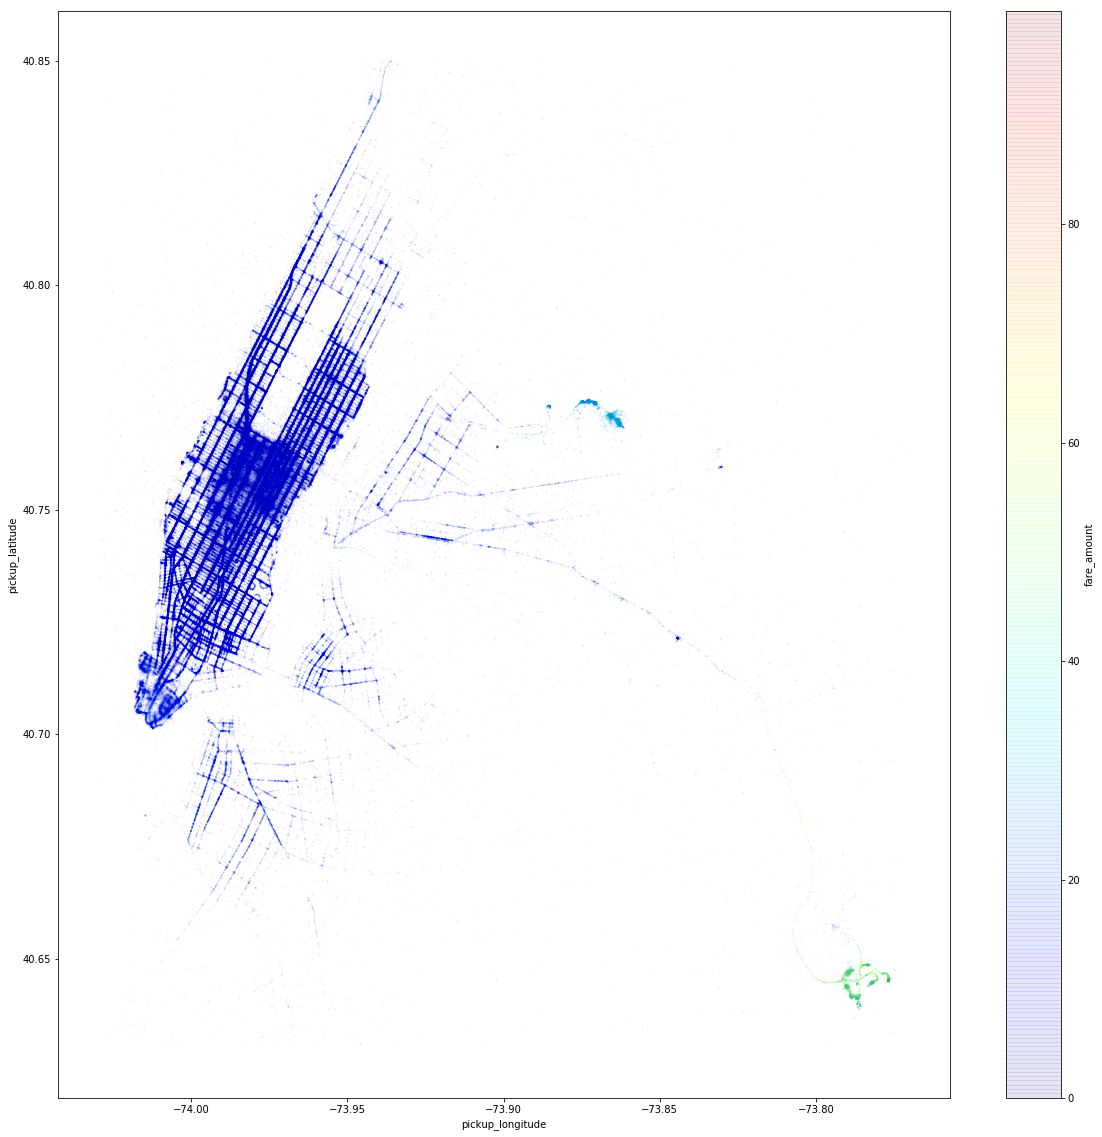

In [36]:
#look at fare amount depending on pickup location
fig, (ax1) = plt.subplots(1,1, figsize=(20,20))
df[df.fare_amount < 100].plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", c="fare_amount", cmap=plt.get_cmap("jet"), alpha=0.1, s=df['fare_amount']/100, ax=ax1)
plt.show()
#fares are higher at airports

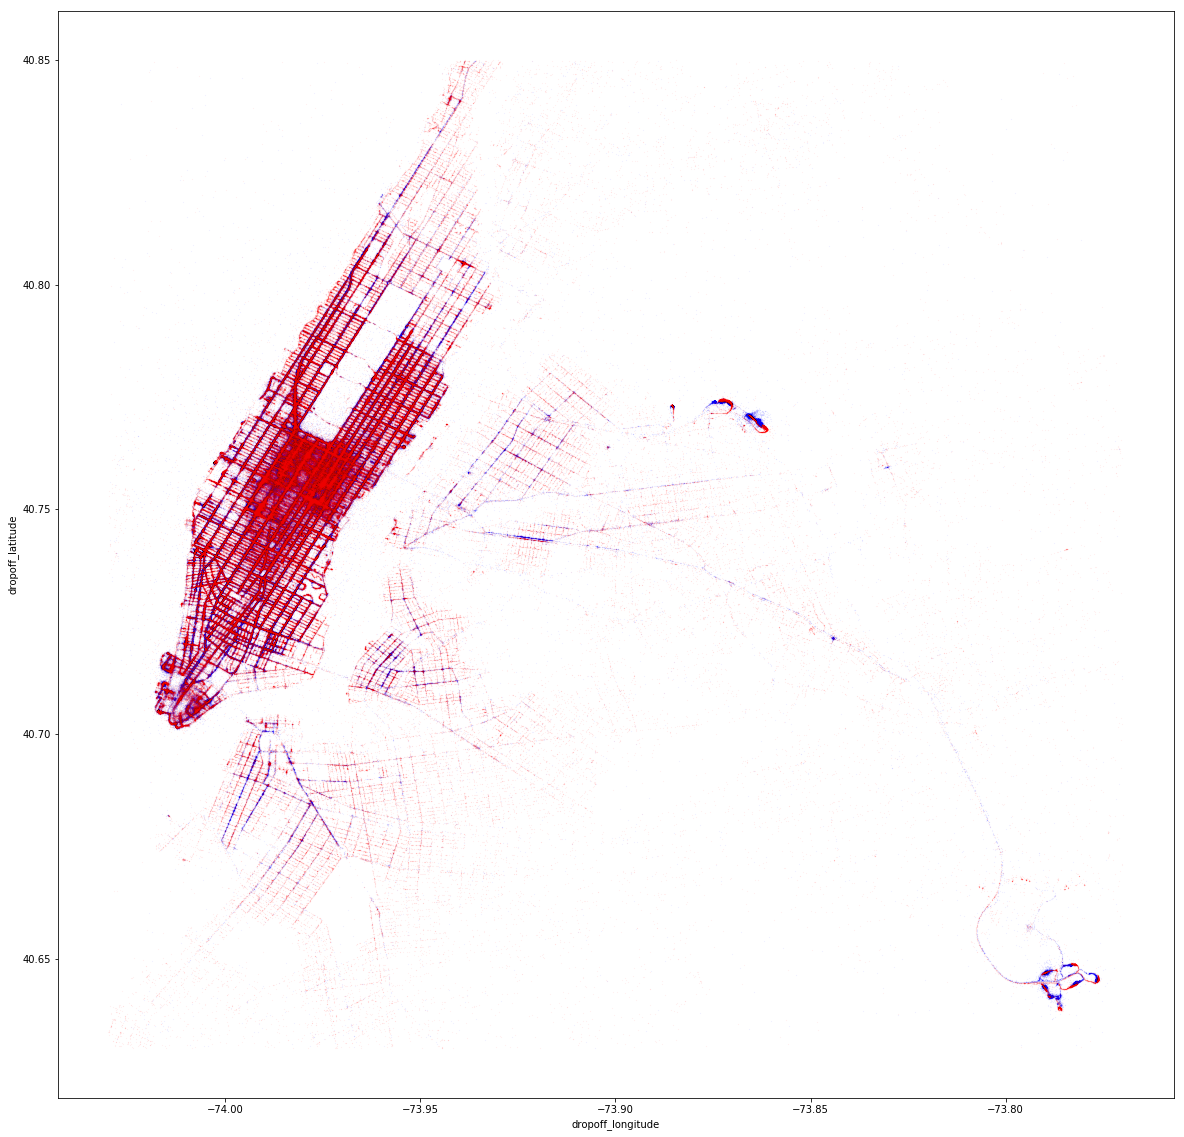

In [37]:
#inbound vs outbound traffic
fig, (ax1) = plt.subplots(1,1, figsize=(20,20))
df.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", c="blue", alpha=0.1, s=0.05, ax=ax1)
df.plot(kind="scatter", x="dropoff_longitude", y="dropoff_latitude", c="red", alpha=0.1, s=0.05, ax=ax1)
plt.show()
#more inbound into the inner city, pickups at the edges and aiports

In [38]:
#lets have a look at clusters to aggregate lat/long data points for model
longitude = list(df.pickup_longitude) + list(df.dropoff_longitude)
latitude = list(df.pickup_latitude) + list(df.dropoff_latitude)
loc_df = pd.DataFrame()
loc_df['longitude'] = longitude
loc_df['latitude'] = latitude
#loc_df = loc_df.drop(loc_df.columns[0], axis=1) 
loc_df.tail()

longitude   latitude
1909165 -73.796524  40.775041
1909166 -73.959196  40.775114
1909167 -73.993397  40.762197
1909168 -73.976832  40.743122
1909169 -73.999450  40.745702

In [39]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
kmeans = KMeans(n_clusters=13, random_state=3, n_init = 13).fit(loc_df)
#kmeans = SpectralClustering(n_clusters=15, affinity='nearest_neighbors',
                           #assign_labels='kmeans').fit(loc_df)

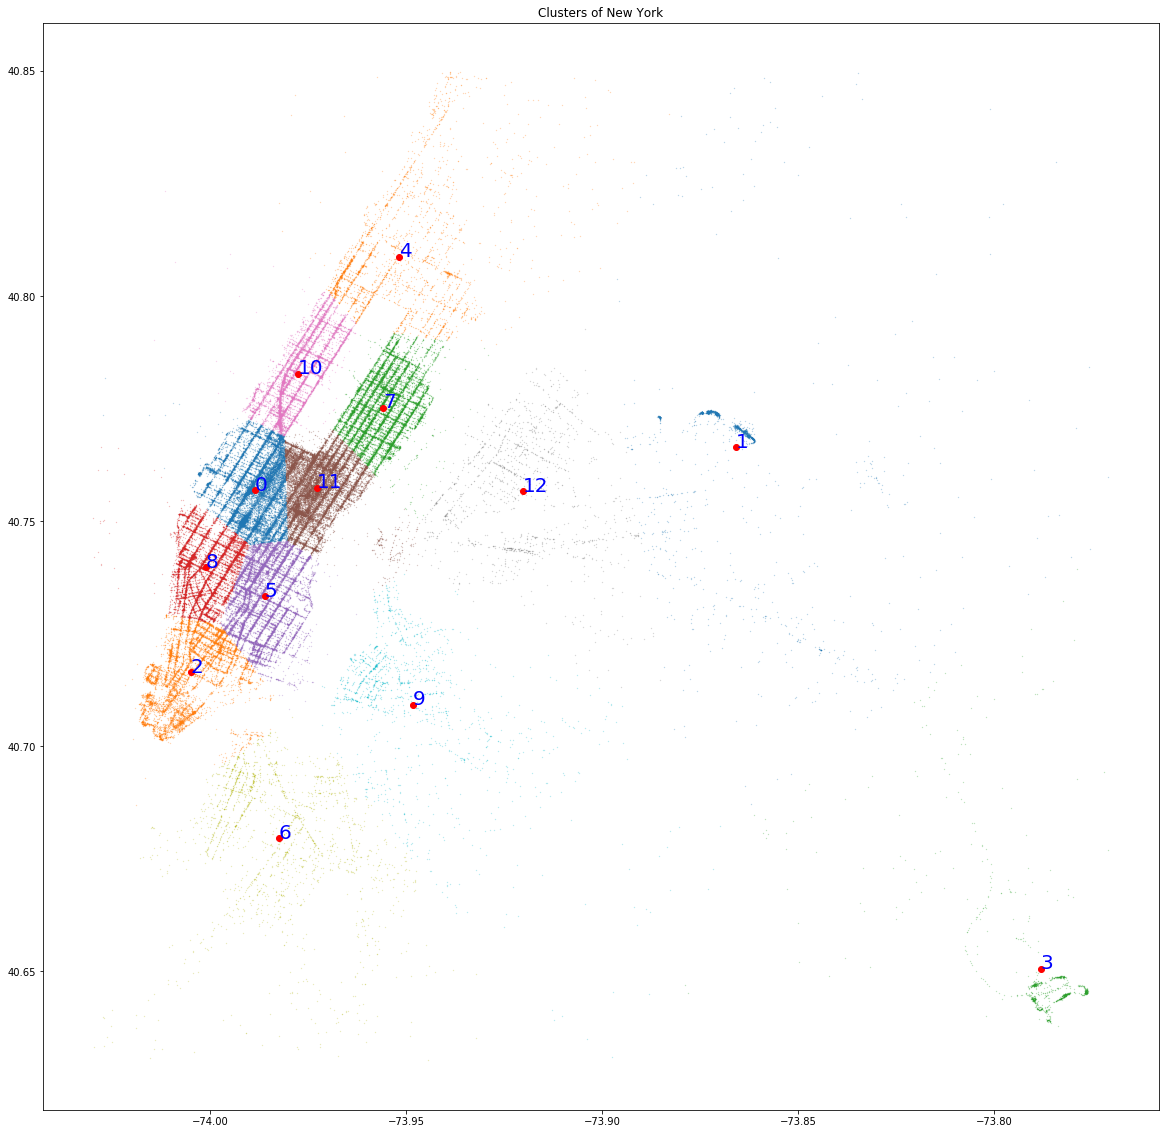

In [40]:
loc_df['label'] = kmeans.labels_
loc_df = loc_df.sample(100000)
fig,ax = plt.subplots(figsize = (20,20))
for label in loc_df.label.unique():
    ax.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 0.5, markersize = 0.5)
    ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r')
    ax.annotate(label, (kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1]), color = 'b', fontsize = 20)
plt.title('Clusters of New York')
plt.show()

In [41]:
df['pickup_cluster'] = kmeans.predict(df[['pickup_longitude','pickup_latitude']])
df['dropoff_cluster'] = kmeans.predict(df[['dropoff_longitude','dropoff_latitude']])


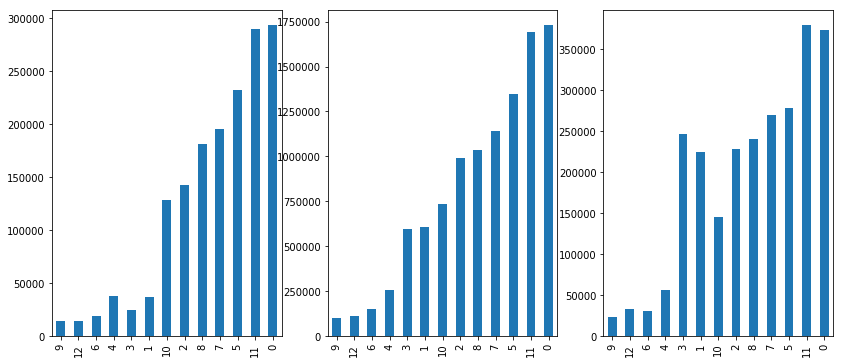

In [42]:
clusters = df.groupby('pickup_cluster')['passenger_count', 'fare_amount', 'distance_km'].sum().reset_index().sort_values('fare_amount')
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(14,6))
clusters["passenger_count"].plot(kind='bar', ax=ax1)
clusters["fare_amount"].plot(kind='bar', ax=ax2)
clusters["distance_km"].plot(kind='bar', ax=ax3)
plt.show()

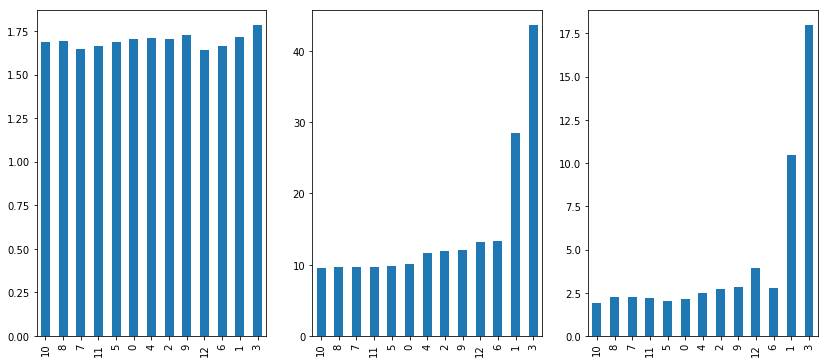

In [43]:
clusters = df.groupby('pickup_cluster')['passenger_count', 'fare_amount', 'distance_km'].mean().reset_index().sort_values('fare_amount')
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(14,6))
clusters["passenger_count"].plot(kind='bar', ax=ax1)
clusters["fare_amount"].plot(kind='bar', ax=ax2)
clusters["distance_km"].plot(kind='bar', ax=ax3)
plt.show()

In [44]:
#df = df.drop(columns=['fare_amount_mean', 'fare_amount_sum'])
df = df.join(df.groupby('pickup_cluster')['fare_amount'].mean(), on='pickup_cluster', rsuffix='_mean')
df = df.join(df.groupby('pickup_cluster')['fare_amount'].sum(), on='pickup_cluster', rsuffix='_sum')
df.tail(5)

key  fare_amount           pickup_datetime  \
999994    2014-06-29 22:57:55.0000001         20.0 2014-06-29 22:57:55+00:00   
999995    2014-09-13 21:44:38.0000001          7.0 2014-09-13 21:44:38+00:00   
999997  2013-04-26 14:03:00.000000118         10.5 2013-04-26 14:03:00+00:00   
999998   2011-07-08 00:29:00.00000099          6.9 2011-07-08 00:29:00+00:00   
999999   2009-12-31 14:30:00.00000021          4.1 2009-12-31 14:30:00+00:00   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
999994        -73.872919        40.774106         -73.796524   
999995        -73.976676        40.785630         -73.959196   
999997        -73.978423        40.751135         -73.993397   
999998        -73.980317        40.759482         -73.976832   
999999        -74.006635        40.741598         -73.999450   

        dropoff_latitude  passenger_count  year  weekday  hour  \
999994         40.775041                2  2014        6    22   
999995         40.775114                1  2014        5    21   
999997         40.762197                5  2013        4    14   
999998         40.743122                1  2011        4     0   
999999         40.745702                1  2009        3    14   

        distance_meters  distance_km  pickup_cluster  dropoff_cluster  \
999994          8526.23         8.53               1                1   
999995          1977.68         1.98              10                7   
999997          1705.61         1.71              11                0   
999998           636.79         0.64              11                5   
999999           811.79         0.81               8                8   

        fare_amount_mean  fare_amount_sum  
999994         28.422879        606800.04  
999995          9.609447        734930.53  
999997          9.730266       1690915.93  
999998          9.730266       1690915.93  
999999          9.639745       1034450.69

In [45]:
df = df[df.distance_km >= 0.01]
df = df[df.fare_amount >= 0.01]
df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  954576.000000     954576.000000    954576.000000      954576.000000   
mean       10.990101        -73.975900        40.751035         -73.974880   
std         8.684768          0.033046         0.026048           0.031193   
min         0.010000        -74.029592        40.630158         -74.029902   
25%         6.000000        -73.992276        40.736719         -73.991542   
50%         8.500000        -73.982127        40.753448         -73.980710   
75%        12.500000        -73.968625        40.767528         -73.966019   
max       450.000000        -73.770115        40.849952         -73.770015   

       dropoff_latitude  passenger_count           year        weekday  \
count     954576.000000    954576.000000  954576.000000  954576.000000   
mean          40.751260         1.685059    2011.745399       3.037963   
std            0.028365         1.307634       1.864222       1.948974   
min           40.630019         0.000000    2009.000000       0.000000   
25%           40.735973         1.000000    2010.000000       1.000000   
50%           40.753907         1.000000    2012.000000       3.000000   
75%           40.768282         2.000000    2013.000000       5.000000   
max           40.849988         6.000000    2015.000000       6.000000   

                hour  distance_meters    distance_km  pickup_cluster  \
count  954576.000000    954576.000000  954576.000000   954576.000000   
mean       13.523923      2644.520541       2.644518        5.882057   
std         6.493103      3603.302271       3.603298        3.950204   
min         0.000000         5.020000       0.010000        0.000000   
25%         9.000000       875.817500       0.880000        2.000000   
50%        14.000000      1562.835000       1.560000        7.000000   
75%        19.000000      2804.107500       2.800000       10.000000   
max        23.000000     27935.170000      27.940000       12.000000   

       dropoff_cluster  fare_amount_mean  fare_amount_sum  
count    954576.000000     954576.000000     9.545760e+05  
mean          5.978023         10.989949     1.249039e+06  
std           3.941090          4.844148     4.326113e+05  
min           0.000000          9.609447     1.004376e+05  
25%           2.000000          9.651847     9.913247e+05  
50%           7.000000          9.757931     1.344936e+06  
75%          10.000000         10.052157     1.690916e+06  
max          12.000000         43.562012     1.728740e+06

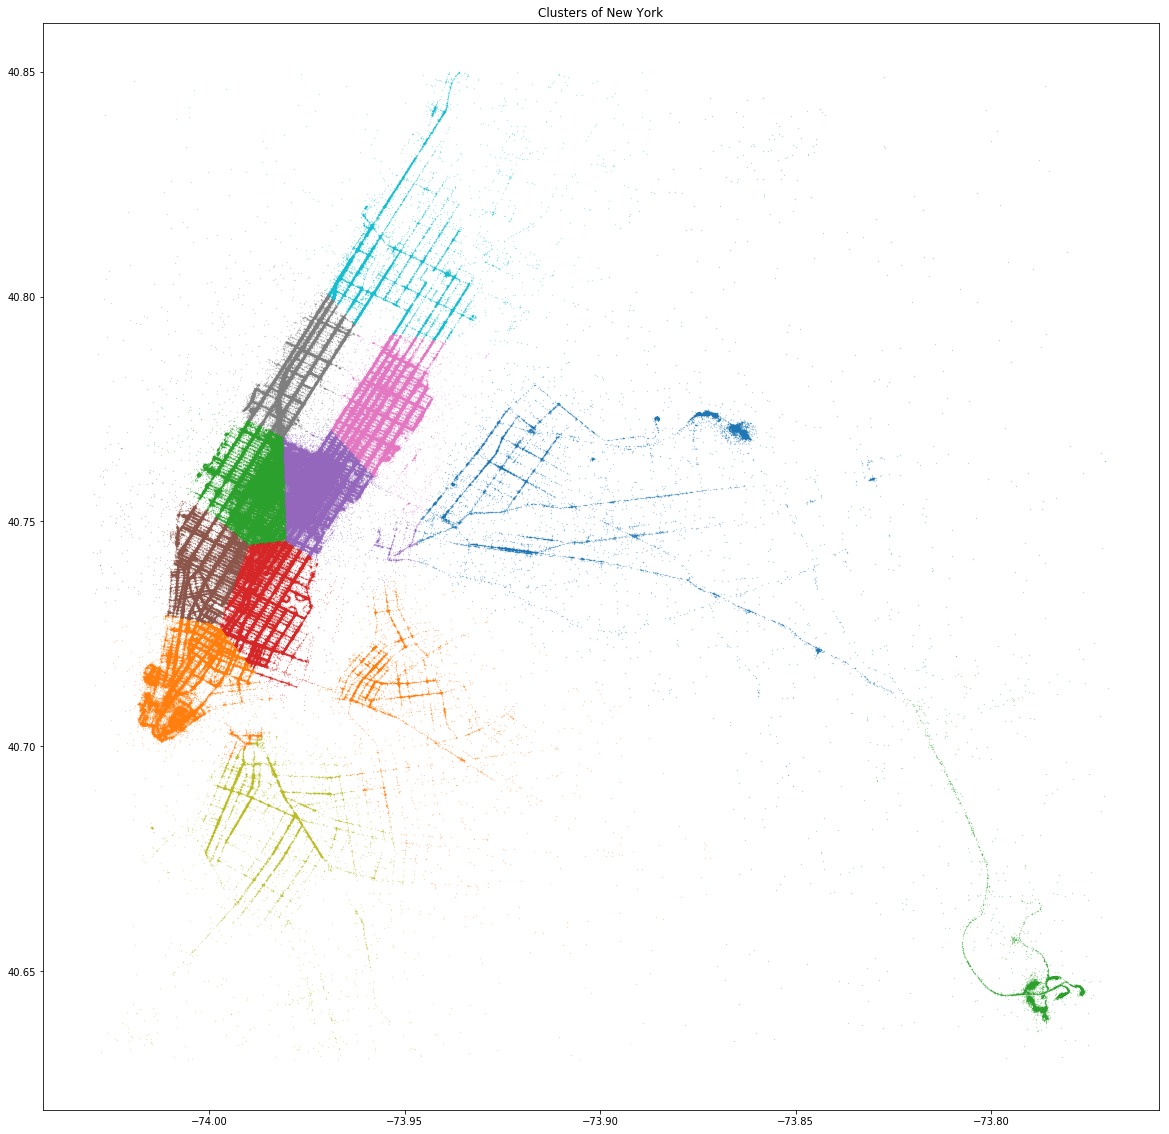

In [46]:
#draw a heat map of mean and sum onto clusters 
fig,ax = plt.subplots(figsize = (20,20))
for pickup_cluster in df.pickup_cluster.unique():
    ax.plot(df.pickup_longitude[df.pickup_cluster == pickup_cluster],df.pickup_latitude[df.pickup_cluster == pickup_cluster],'.', alpha = 0.5, markersize = 0.5)
plt.title('Clusters of New York')
plt.show()

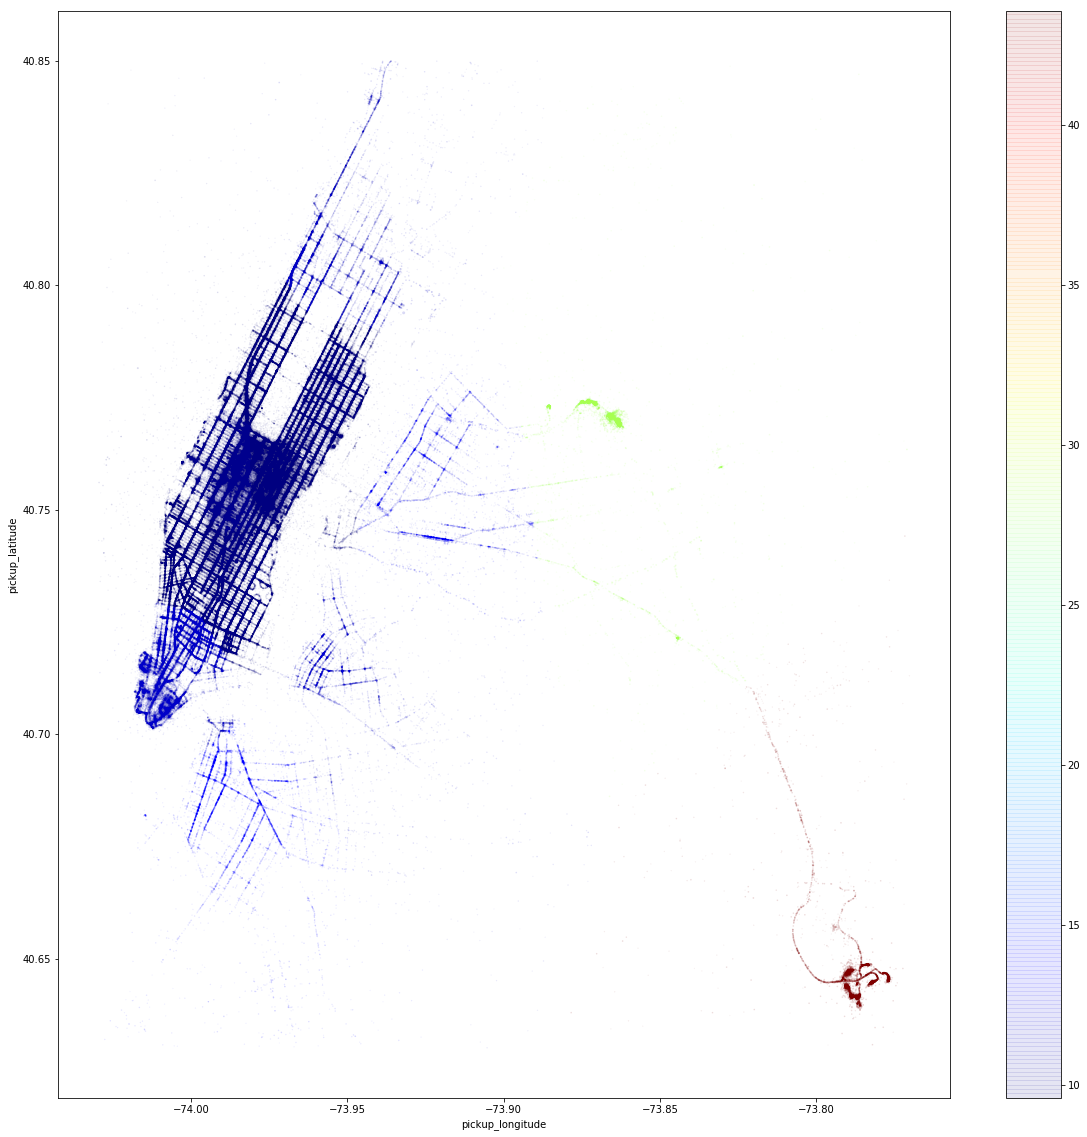

In [47]:
fig, (ax1) = plt.subplots(1,1, figsize=(20,20))
df.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", c=df["fare_amount_mean"], cmap=plt.get_cmap("jet"), alpha=0.1, s=df['fare_amount']/100, ax=ax1)
plt.show()

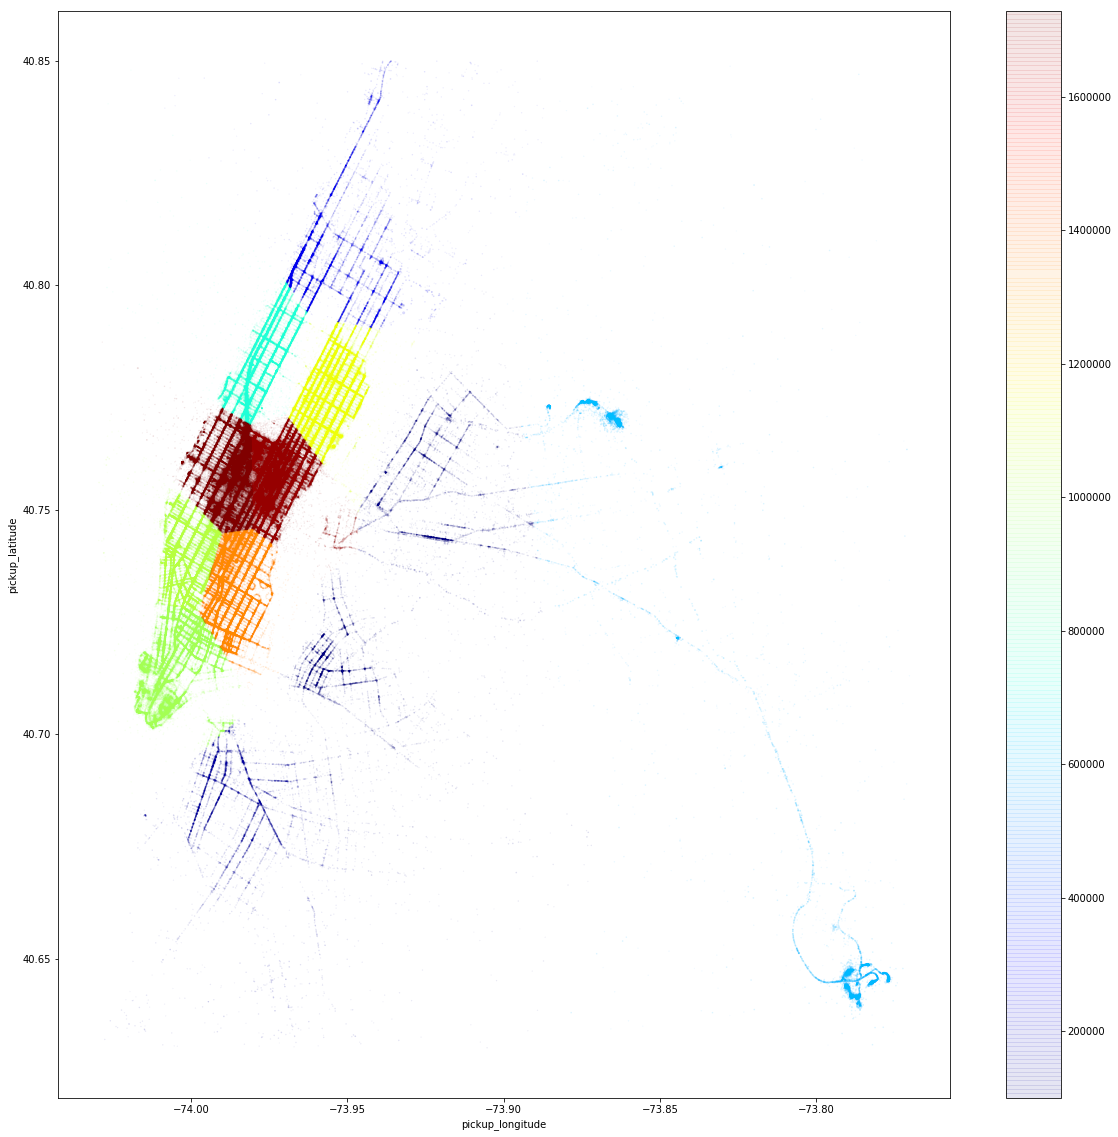

In [48]:
fig, (ax1) = plt.subplots(1,1, figsize=(20,20))
df.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", c=df["fare_amount_sum"], cmap=plt.get_cmap("jet"), alpha=0.1, s=df['fare_amount']/100, ax=ax1)
plt.show()

In [49]:
#pca needed?
idx = df
features = ['year', 'hour', 'distance_km', 'pickup_cluster']
X = idx[features].values
y = idx['fare_amount'].values
X.shape, y.shape

((954576, 4), (954576,))

In [50]:
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

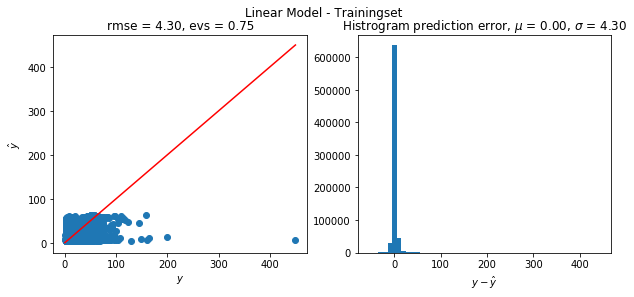

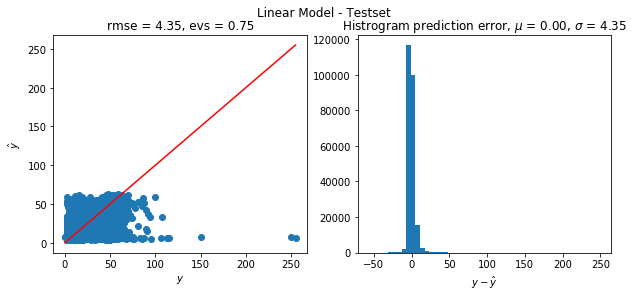

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(X_train, y_train)

y_train_pred = model_lin.predict(X_train)
plot_prediction_analysis(y_train, y_train_pred, title='Linear Model - Trainingset')

y_test_pred = model_lin.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Linear Model - Testset')

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing
from sklearn import utils
from time import time
from sklearn.metrics import mean_absolute_error

In [54]:
from sklearn.model_selection import train_test_split
df_t = df.sample(500000)
df.drop(df_t.index)
features = ['year', 'hour', 'weekday', 'distance_km', 'pickup_cluster', 'dropoff_cluster']
X_features = df_t[features].values
Y_target = df_t['fare_amount'].values
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_target, test_size=0.1)
X_train.shape, Y_train.shape

((450000, 6), (450000,))

In [55]:
df_v = df_t.sample(50000)
X_Val = df_v[features].values
Y_Val = df_v['fare_amount'].values

In [61]:
classifier_names = [
    #"VotingRegressor",
    "ExtraTreesRegressor",
    "BaggingRegressor",
    "AdaBoostRegressor",
    "DecisionTreeRg",
    "RandomForestRg",
    "GradientBoostingRg",
    "NeuralNet1", 
    "NeuralNet2", 
    #"Naive Bayes"
]

In [62]:
classifiers = [
    #VotingRegressor(estimators=10),
    ExtraTreesRegressor(),
    BaggingRegressor(),
    AdaBoostRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100, max_depth=34),
    GradientBoostingRegressor(n_estimators=100, max_depth=6),
    MLPRegressor(hidden_layer_sizes=(20, 50), max_iter=400, verbose=true),
    MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=400),
    #GaussianNB(),
]

In [63]:
for clf, clf_name in zip(classifiers, classifier_names):
    print(f"** {clf_name}")
    t0 = time()
    clf.fit(X_train, Y_train)
    t1 = time()
    print(f"\tTraining time:\t\t{t1-t0:3.3f}")
    score_train = clf.score(X_train[0:10000], Y_train[0:10000])
    t2 = time()
    print(f"\tPrediction time(train):\t{t2-t1:3.3f}")
    score_test = clf.score(X_test, Y_test)
    t3 = time()
    print(f"\tPrediction time(test):\t{t3-t2:3.3f}")
    print(f"\tScore Train: {score_train:.3f}\tScore Test: {score_test:.3f}")
    predictions = clf.predict(X_Val)
    df_v[clf_name] = predictions
    mse = mean_squared_error(Y_Val, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_Val, predictions)
    print(f"\tMSE: {mse:.3f}\tRMSE: {rmse:.3f}\tMAE: {mae:.3f}")

** ExtraTreesRegressor


C:\Users\master\Anaconda3\envs\mm\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


	Training time:		13.368
	Prediction time(train):	0.078
	Prediction time(test):	0.348
	Score Train: 0.996	Score Test: 0.762
	MSE: 2.058	RMSE: 1.434	MAE: 0.303
** BaggingRegressor
	Training time:		16.182
	Prediction time(train):	0.072
	Prediction time(test):	0.322
	Score Train: 0.954	Score Test: 0.780
	MSE: 4.208	RMSE: 2.051	MAE: 1.067
** AdaBoostRegressor
	Training time:		19.509
	Prediction time(train):	0.042
	Prediction time(test):	0.221
	Score Train: 0.661	Score Test: 0.668
	MSE: 22.734	RMSE: 4.768	MAE: 3.519
** DecisionTreeRg
	Training time:		2.375
	Prediction time(train):	0.009
	Prediction time(test):	0.037
	Score Train: 0.996	Score Test: 0.577
	MSE: 3.258	RMSE: 1.805	MAE: 0.359
** RandomForestRg
	Training time:		165.213
	Prediction time(train):	0.642
	Prediction time(test):	2.883
	Score Train: 0.968	Score Test: 0.796
	MSE: 3.395	RMSE: 1.842	MAE: 0.983
** GradientBoostingRg
	Training time:		104.507
	Prediction time(train):	0.036
	Prediction time(test):	0.173
	Score Train: 0.822	Scor

C:\Users\master\Anaconda3\envs\mm\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


	Training time:		295.389
	Prediction time(train):	0.007
	Prediction time(test):	0.036
	Score Train: 0.751	Score Test: 0.748
	MSE: 16.937	RMSE: 4.115	MAE: 2.732
** NeuralNet2
	Training time:		517.059
	Prediction time(train):	0.035
	Prediction time(test):	0.177
	Score Train: 0.749	Score Test: 0.741
	MSE: 17.305	RMSE: 4.160	MAE: 2.600


In [64]:
df_v.tail(5)

key  fare_amount           pickup_datetime  \
914169    2013-02-18 14:11:42.0000002         11.0 2013-02-18 14:11:42+00:00   
793664   2014-04-24 17:27:00.00000050         17.5 2014-04-24 17:27:00+00:00   
947730  2010-01-02 12:31:00.000000101          9.7 2010-01-02 12:31:00+00:00   
252775    2012-02-12 16:59:21.0000003          7.7 2012-02-12 16:59:21+00:00   
488622  2014-02-16 21:36:00.000000152         12.5 2014-02-16 21:36:00+00:00   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
914169        -73.947727        40.771948         -73.981622   
793664        -73.958238        40.769032         -73.977462   
947730        -74.011780        40.709337         -73.989055   
252775        -73.980447        40.764300         -73.996385   
488622        -73.991485        40.759657         -73.953425   

        dropoff_latitude  passenger_count  year  weekday  ...  \
914169         40.770341                1  2013        0  ...   
793664         40.742850                1  2014        3  ...   
947730         40.751173                2  2010        5  ...   
252775         40.753237                4  2012        6  ...   
488622         40.771767                1  2014        6  ...   

        fare_amount_mean  fare_amount_sum  ExtraTreesRegressor  \
914169          9.651847       1143242.02                 11.0   
793664          9.651847       1143242.02                 17.5   
947730         11.860646        991324.69                  9.7   
252775          9.730266       1690915.93                  7.7   
488622         10.052157       1728739.88                 12.5   

        BaggingRegressor  AdaBoostRegressor  DecisionTreeRg  RandomForestRg  \
914169             11.15          12.618722            11.0          11.955   
793664             14.25          10.465682            17.5          16.155   
947730             11.30          12.964554             9.7          11.008   
252775              8.14          10.465682             7.7           8.440   
488622             12.50          15.357969            12.5          12.720   

        GradientBoostingRg  NeuralNet1  NeuralNet2  
914169           15.180984   14.270765   13.124663  
793664           11.883350   11.030638    9.879561  
947730           13.223618   13.450844   14.005564  
252775            7.985320    8.779977    8.769204  
488622           14.291841   14.588166   14.647297  

[5 rows x 25 columns]

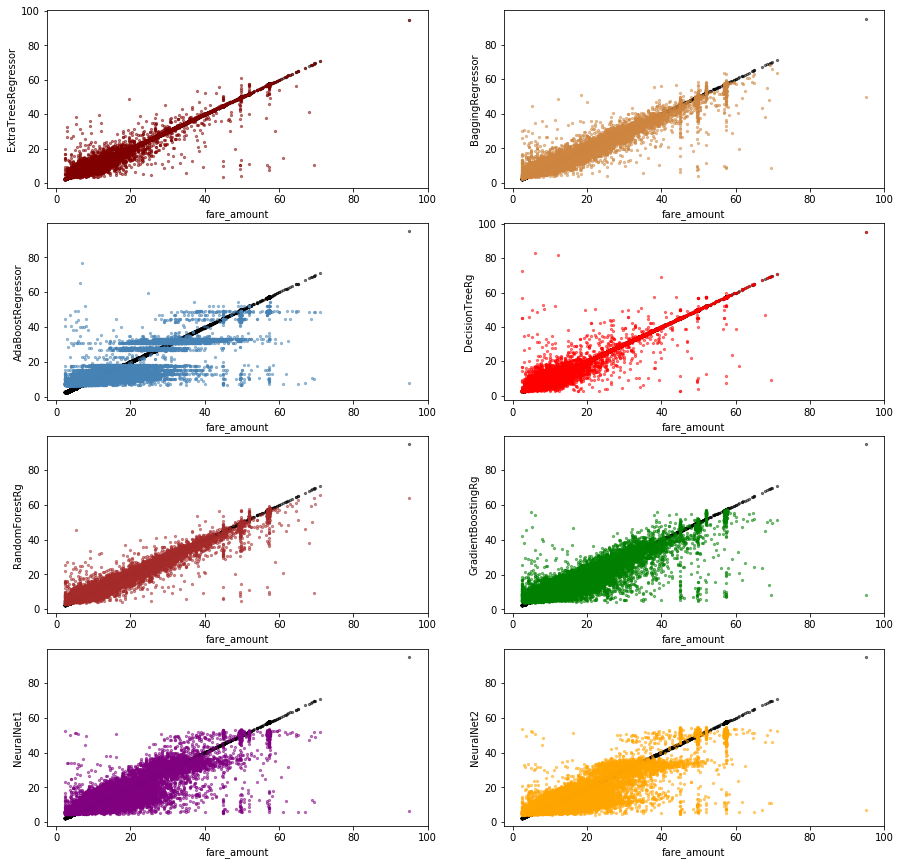

In [72]:
fig, ((ax1,ax2),
     (ax3,ax4),
     (ax5,ax6),
     (ax7,ax8),
     ) = plt.subplots(4,2, figsize=(15,15))

df_v.plot(kind="scatter", x="fare_amount", y="fare_amount", c="black", alpha=0.5, s=5, ax=ax1)
df_v.plot(kind="scatter", x="fare_amount", y="ExtraTreesRegressor", c="maroon", alpha=0.5, s=5, ax=ax1)

df_v.plot(kind="scatter", x="fare_amount", y="fare_amount", c="black", alpha=0.5, s=5, ax=ax2)
df_v.plot(kind="scatter", x="fare_amount", y="BaggingRegressor", c="peru", alpha=0.5, s=5, ax=ax2)

df_v.plot(kind="scatter", x="fare_amount", y="fare_amount", c="black", alpha=0.5, s=5, ax=ax3)
df_v.plot(kind="scatter", x="fare_amount", y="AdaBoostRegressor", c="steelblue", alpha=0.5, s=5, ax=ax3)

df_v.plot(kind="scatter", x="fare_amount", y="fare_amount", c="black", alpha=0.5, s=5, ax=ax4)
df_v.plot(kind="scatter", x="fare_amount", y="DecisionTreeRg", c="red", alpha=0.5, s=5, ax=ax4)

df_v.plot(kind="scatter", x="fare_amount", y="fare_amount", c="black", alpha=0.5, s=5, ax=ax5)
df_v.plot(kind="scatter", x="fare_amount", y="RandomForestRg", c="brown", alpha=0.5, s=5, ax=ax5)

df_v.plot(kind="scatter", x="fare_amount", y="fare_amount", c="black", alpha=0.5, s=5, ax=ax6)
df_v.plot(kind="scatter", x="fare_amount", y="GradientBoostingRg", c="green", alpha=0.5, s=5, ax=ax6)

df_v.plot(kind="scatter", x="fare_amount", y="fare_amount", c="black", alpha=0.5, s=5, ax=ax7)
df_v.plot(kind="scatter", x="fare_amount", y="NeuralNet1", c="purple", alpha=0.5, s=5, ax=ax7)

df_v.plot(kind="scatter", x="fare_amount", y="fare_amount", c="black", alpha=0.5, s=5, ax=ax8)
df_v.plot(kind="scatter", x="fare_amount", y="NeuralNet2", c="orange", alpha=0.5, s=5, ax=ax8)
plt.show()
#mlp seems to be all over the place, maybe round down the precision of the fare to 0 decimal? make it a classification problem